In [2]:
from google.colab import files
uploaded = files.upload()

Saving spiral1.csv to spiral1.csv
Saving titanic_MAD.csv to titanic_MAD.csv
Saving data_banknote_authentication.csv to data_banknote_authentication.csv


In [3]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
np.random.seed(123)

In [99]:
#Zad 1
url = 'data_banknote_authentication.csv'
df = pandas.read_csv(url,header=0)
data = df.values
print(df.head(3))
X = data[:,:-1]
X = X[:,(0,1)]
y = data[:,-1]
y = LabelEncoder().fit_transform(y.astype("str"))
scaler = StandardScaler() 
#X = scaler.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, shuffle=False)
X_train[(0,1),:]

   variance  skewness  kurtosis  entropy  class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0
2    3.8660   -2.6383    1.9242  0.10645      0


array([[3.6216, 8.6661],
       [4.5459, 8.1674]])

In [100]:
scaler = StandardScaler() 
X_train_1 = scaler.fit_transform(X_train) 
X_test_1 = scaler.transform(X_test)
print(X_train_1[(0,1),:])


[[0.8481969  0.98047937]
 [1.20693011 0.89167082]]


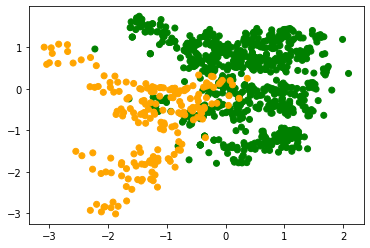

In [101]:
plt.figure
colormap = np.array(["green", "orange"])
plt.scatter(X_train_1[:,0],X_train_1[:,1], c = colormap[y_train])
plt.show()


In [75]:
svm = LinearSVC(loss = 'hinge', C=1)
svm.fit(X_train_1, y_train)


LinearSVC(C=1, loss='hinge')

In [76]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_1, y_train)

KNeighborsClassifier(n_neighbors=10)

In [77]:
auc_svm = svm.score(X_test_1, y_test)
auc_knn = knn.score(X_test_1,y_test)
print(f"dla knn: {auc_knn}, dla svm: {auc_svm}")

dla knn: 0.8155339805825242, dla svm: 0.7087378640776699


In [78]:
# lepiej dopasowana jest metoda najblizszych sąsiadów, może to wynikać ze względu na to że jak widzimy z wykresu obserwacje w różnych klasach na siebie zachodzą
# zatem prosta, którą dopasowuje svm, aby oddzielić dane prawdopodbnie przechodzi przez te punkty i źle je klasyfikuje


In [23]:
np.random.seed(123)

In [79]:
#Zad 2
url = 'spiral1.csv'
df = pandas.read_csv(url,header=0)
print(df.head(3))
data = df.values
X = data[:,:-1]
y = data[:,-1]
y = LabelEncoder().fit_transform(y.astype("str"))
scaler = StandardScaler() 
X_1 = scaler.fit_transform(X) 
#X_test_1 = scaler.transform(X_test)
print(X_1[(0,1),:])


      V1    V2  V3
0  31.95  7.95   0
1  31.15  7.30   0
2  30.45  6.65   0
[[ 1.8580443  -1.22439397]
 [ 1.74827806 -1.31919843]]


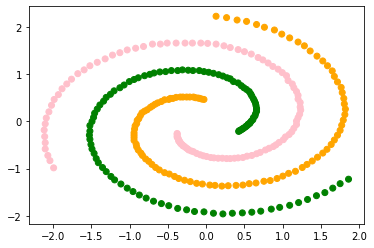

In [80]:
colormap = np.array(["green", "orange","pink"])
plt.scatter(X_1[:,0],X_1[:,1], c = colormap[y])

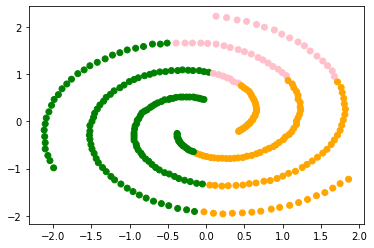

In [81]:
hier = AgglomerativeClustering(n_clusters=3, linkage="complete")
prob = hier.fit_predict(X_1,y)
plt.scatter(X_1[:,0],X_1[:,1], c = colormap[prob])
# niezbyt dobrze działa jak widać porównując ten wykres i poprzedni, prawdopodbnie obserwacje są zbyt daleko od siebie i przypiswane są do jednego klastra

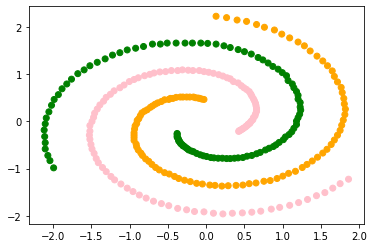

In [82]:
hier1 = AgglomerativeClustering(n_clusters=3, linkage="single")
prob1 = hier1.fit_predict(X_1,y)
plt.scatter(X_1[:,0],X_1[:,1], c = colormap[prob1])
# z single metoda działa bardzo dobrze, wynika to z tego, że complete bierze pod uwagę najdalej położone względem siebie punkty w klastrach a single najbliżej

In [44]:
np.random.seed(123)

In [111]:
#Zad 3
url = 'titanic_MAD.csv'
df = pandas.read_csv(url,header=0)
print(df.head(3))
data = df.values
X = data[:,1:]

y = data[:,0]
y = LabelEncoder().fit_transform(y.astype("str"))
scaler = StandardScaler() 
X = scaler.fit_transform(X) 


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, shuffle=False)
X_train[(0,1),:]

   Survived  Pclass  Sex   Age  Siblings.Spouses.Aboard  \
0         0       3  0.0  22.0                        1   
1         1       1  1.0   NaN                        1   
2         1       3  1.0  26.0                        0   

   Parents.Children.Aboard     Fare  
0                        0   7.2500  
1                        0  71.2833  
2                        0   7.9250  


array([[ 0.83052363, -0.73692469, -0.53008486,  0.42990395, -0.4749808 ,
        -0.50358635],
       [-1.56127657,  1.35699077,         nan,  0.42990395, -0.4749808 ,
         0.78341245]])

In [112]:
simp_mean = SimpleImputer(strategy = "mean", missing_values=np.nan)
simp_freq = SimpleImputer(strategy="most_frequent", missing_values=np.nan)
colt = ColumnTransformer([("s_mean", simp_mean,[2]),("s_freq",simp_freq,[1])], remainder='passthrough')
clf_bag = BaggingClassifier(base_estimator=LogisticRegression(penalty='none',max_iter=1000))

pipe = Pipeline(steps =[("prep",colt),("m1",clf_bag)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('s_mean', SimpleImputer(),
                                                  [2]),
                                                 ('s_freq',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1])])),
                ('m1',
                 BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                                     penalty='none')))])

In [113]:
param_grid = {'m1__n_estimators':[50,100,200]}
search = GridSearchCV(pipe, param_grid)
search.fit(X_train, y_train)
print(f"najlepszy parametr: {search.best_params_}")


najlepszy parametr: {'m1__n_estimators': 50}


In [114]:
simp_mean = SimpleImputer(strategy = "mean", missing_values=np.nan)
simp_freq = SimpleImputer(strategy="most_frequent", missing_values=np.nan)
colt = ColumnTransformer([("s_mean", simp_mean,[2]),("s_freq",simp_freq,[1])], remainder='passthrough')
clf_bag = BaggingClassifier(base_estimator=LogisticRegression(penalty='none',max_iter=1000),n_estimators=50)

pipe2 = Pipeline(steps =[("prep",colt),("m1",clf_bag)])
pipe2.fit(X_train, y_train)
print(pipe2.score(X_test,y_test))
prob_2 = pipe2.predict_proba(X_test)
prob_2 = prob_2[:,1]
print(f"AUC dla nowego pipeline: {roc_auc_score(y_test,prob_2)}")

0.8052434456928839
AUC dla nowego pipeline: 0.8686038011695907


In [115]:
print(search.score(X_test,y_test))
prob = search.predict_proba(X_test)
prob = prob[:,1]
print(f"AUC: {roc_auc_score(y_test,prob)}")

0.8089887640449438
AUC: 0.8661671539961014
